# Assignment 3
## Aman Kumar
## 1CR19CS012

# Heirarichal Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
X = dataset.iloc[:,[3,4]].values #select a specific row or column from the data set

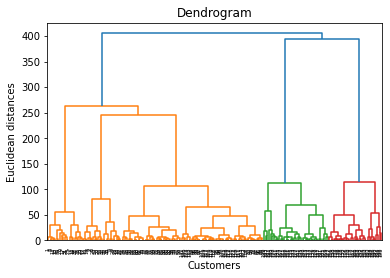

In [6]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


# Fitting hierarchical clustering to the Mall_Customes dataset
There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')

In [8]:
y_hc = hc.fit_predict(X)

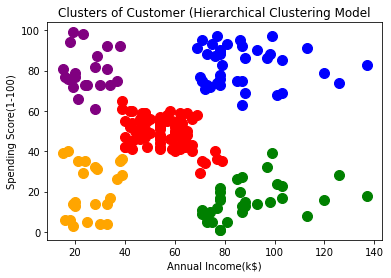

In [9]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Text analysis using topic modelling

In [10]:
import pandas as pd
import os

In [11]:
papers  = pd.read_csv('papers.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [12]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [13]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4225,2012,ImageNet Classification with Deep Convolutiona...,"We trained a large, deep convolutional neural ...",ImageNet Classification with Deep Convolutiona...
9,1994,Pulsestream Synapses with Non-Volatile Analogu...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
1965,2005,Oblivious Equilibrium: A Mean Field Approximat...,Abstract Missing,Oblivious Equilibrium: A Mean Field\nApproxima...
5583,2016,Only H is left: Near-tight Episodic PAC RL,In many applications such as advertisement pla...,Launch and Iterate: Reducing Prediction Churn\...
3962,2012,Phoneme Classification using Constrained Varia...,This paper describes a new acoustic model base...,Phoneme Classification using Constrained Varia...


In [14]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x)) # removing special symbols

In [15]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

4225    imagenet classification with deep convolutiona...
9       real-time control of a tokamak plasma\nusing n...
1965    oblivious equilibrium: a mean field\napproxima...
5583    launch and iterate: reducing prediction churn\...
3962    phoneme classification using constrained varia...
Name: paper_text_processed, dtype: object

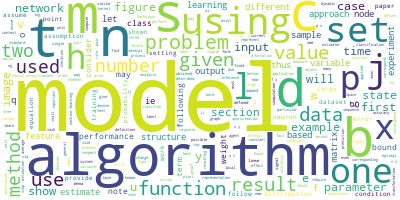

In [16]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['imagenet', 'classification', 'deep', 'convolutional', 'neural', 'networks', 'alex', 'krizhevsky', 'university', 'toronto', 'kriz', 'csutorontoca', 'ilya', 'sutskever', 'university', 'toronto', 'ilya', 'csutorontoca', 'geoffrey', 'hinton', 'university', 'toronto', 'hinton', 'csutorontoca', 'abstract', 'trained', 'large', 'deep', 'convolutional', 'neural']


In [18]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words # a group presenting multiple collections of text documents

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 9), (8, 2), (9, 2), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 4), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 2)]


In [19]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"algorithm" + 0.005*"model" + 0.004*"figure" + 0.004*"training" + '
  '0.004*"function" + 0.003*"set" + 0.003*"problem" + 0.003*"using" + '
  '0.003*"learning" + 0.003*"one"'),
 (1,
  '0.007*"algorithm" + 0.007*"model" + 0.005*"data" + 0.005*"matrix" + '
  '0.004*"time" + 0.004*"learning" + 0.004*"one" + 0.003*"function" + '
  '0.003*"using" + 0.003*"distribution"'),
 (2,
  '0.007*"function" + 0.005*"model" + 0.005*"learning" + 0.004*"algorithm" + '
  '0.004*"data" + 0.003*"value" + 0.003*"xi" + 0.003*"network" + 0.003*"two" + '
  '0.003*"using"'),
 (3,
  '0.006*"model" + 0.005*"data" + 0.005*"algorithm" + 0.004*"figure" + '
  '0.004*"learning" + 0.004*"two" + 0.004*"one" + 0.004*"set" + 0.004*"using" '
  '+ 0.004*"function"'),
 (4,
  '0.005*"model" + 0.004*"data" + 0.004*"using" + 0.004*"function" + '
  '0.004*"algorithm" + 0.004*"set" + 0.004*"matrix" + 0.003*"figure" + '
  '0.003*"time" + 0.003*"two"'),
 (5,
  '0.005*"model" + 0.005*"learning" + 0.005*"data" + 0.005*"u